# **DSL 24-1 기초 과제 2**

### 기수 : 11기
### 이름 : 백두형

In [29]:
# 코랩에서 작성할 경우
# from google.colab import drive
# drive.mount('/content/drive')

필수 라이버러리 갖고오기

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **1**

해당 문제는 데이터를 전처리를 기초적으로 어떻게 하는지 알아보기 위해서 만들어진 문제입니다.

경로 설정 (turnout_2016.csv 으로 맞춰주세요!)

In [31]:
path_to_file = "turnout_2016.csv"

다음과 같은 데이터는 2016년도에 미국 선거 관련 데이터입니다.

In [32]:
turnout = pd.read_csv(path_to_file)
turnout.head()

county fips             cand  st  pct_report     votes  total_votes  \
0    NaN   US     Donald Trump  US      0.9968  61195258    130180957   
1    NaN   US  Hillary Clinton  US      0.9968  62521739    130180957   
2    NaN   US     Gary Johnson  US      0.9968   4274900    130180957   
3    NaN   US       Jill Stein  US      0.9968   1316040    130180957   
4    NaN   US    Evan McMullin  US      0.9968    469770    130180957   

           lead       pct state.name  
0  Donald Trump  0.470078        NaN  
1  Donald Trump  0.480268        NaN  
2  Donald Trump  0.032838        NaN  
3  Donald Trump  0.010109        NaN  
4  Donald Trump  0.003609        NaN

In [33]:
turnout.columns

Index(['county', 'fips', 'cand', 'st', 'pct_report', 'votes', 'total_votes',
       'lead', 'pct', 'state.name'],
      dtype='object')

## **1-1**

state.name 컬럼을 살펴보면 값들이 다음과 같습니다.

In [34]:
turnout.value_counts('state.name', dropna = False)

state.name
Colorado          1430
Texas             1020
Iowa              1000
Louisiana          845
Minnesota          792
Kentucky           726
Tennessee          672
Virginia           670
Arkansas           608
Mississippi        581
Missouri           580
Wisconsin          511
Michigan           504
Georgia            480
Ohio               445
Kansas             424
Illinois           412
Florida            408
Nebraska           376
Idaho              360
Pennsylvania       340
South Carolina     329
North Dakota       324
North Carolina     303
Utah               300
California         295
Montana            285
Washington         280
West Virginia      280
Indiana            279
Alabama            272
New Mexico         272
South Dakota       268
New York           252
Oklahoma           234
New Jersey         198
Oregon             148
Wyoming            144
Nevada             108
Maryland           100
Vermont             90
Maine               68
Arizona             64


In [35]:
na_vals = turnout['state.name'].isna().sum()
print("NaN 값들의 갯수 : ", na_vals)

NaN 값들의 갯수 :  40


위와 같이 **NaN** 값들이 40 개가 있습니다. 해당 컬럼인 ***state.name*** 컬럼에서 **NaN** 값들을 없애주고, 완전히 없애졌는지 확인까지 해주시오.

In [36]:
turnout = turnout.dropna(subset=['state.name'])

없애졌는지 확인하기, True 가 나오면 아직 NaN 값들이 존재하며, False 가 나오면 NaN 값들이 사려졌다는 뜻입니다.

In [37]:
na_state = turnout['state.name'].isna().any()
print("NaN State : ", na_state)

NaN State :  False


## **1-2**

후보자들에 관한 데이터 수들을 다음과 같습니다.

In [38]:
turnout.value_counts('cand')

cand
Hillary Clinton              3161
Donald Trump                 3161
Gary Johnson                 3161
Jill Stein                   2644
Darrell Castle               1329
Rocky De La Fuente           1011
Evan McMullin                 805
Alyson Kennedy                406
Gloria La Riva                400
Jim Hedges                    224
Dan Vacek                     188
Lynn Kahn                     176
Mike Smith                    161
Emidio Soltysik               149
Chris Keniston                130
Laurence Kotlikoff            130
Tom Hoefling                  130
Monica Moorehead              125
Richard Duncan                 89
Rod Silva                      65
Ryan Scott                     65
Princess Jacob                 65
Joseph Maldonado               65
Michael Maturen                65
Kyle Kopitke                   65
Jerry White                    65
Frank Atwood                   65
Bradford Lyttle                65
Peter Skewes                   47
Scott Cop

모든 주에 대해서 가장 높은 투표 수를 가진 5명의 후보자들이 누구이며 각각 얼마나 많은 총 투표 수 (**votes**) 를 얻었는지에 대해서 알고 싶습니다. 전처리를 통해서 위의 결과를 도출하시오.

In [39]:
big_cand = turnout.groupby('cand')['votes'].sum()
big_cand = big_cand.nlargest(5)
big_cand

cand
Hillary Clinton    124430025
Donald Trump       122236995
Gary Johnson         8526205
Jill Stein           2619645
Evan McMullin         939540
Name: votes, dtype: int64

## **1-3**

**1-2** 에서 구한 데이터를 시각화 시키고 싶습니다. 본인이 생각하는 가장 효과적인 시각화 방법을 선택 후 구현하시오. seaborn 과 matplotlib 의 pyplot 중에서 아무거나 선택하셔도 상관없습니다.

Text(0.5, 1.0, 'Big 5 Candidates Votes')

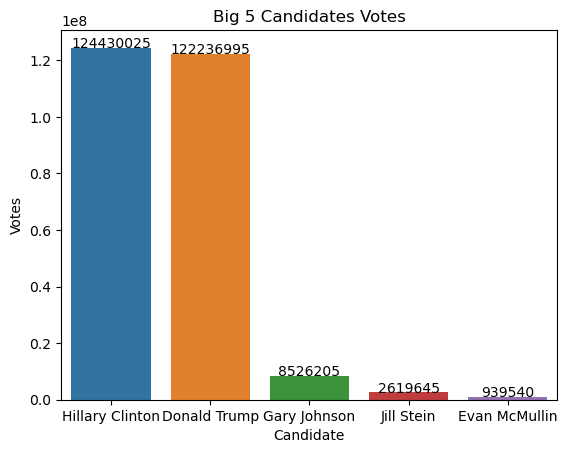

In [40]:
import seaborn as sns


sns.barplot(x = big_cand.index, y = big_cand.values)
for i in range(len(big_cand.index)):
    plt.text(x=i, y=big_cand.values[i] + 100, s=str(big_cand.values[i]), ha = 'center')
plt.xlabel('Candidate')
plt.ylabel('Votes')
plt.title('Big 5 Candidates Votes')

# **3**

spam.csv 와 spam_other.csv 에 대한 경로 설정을 우선적으로 해주세요!

In [41]:
path_to_spam = "spam.csv"
path_to_spam_other = "spam_other.csv"

## **3-1**

spam.csv 의 데이터는 다음과 같습니다.

In [42]:
spam = pd.read_csv(path_to_spam, index_col = 0)
spam

Spam State
No.                   
1                 Spam
2             Not Spam
3                 Spam
4                 Spam
5             Not Spam
6                 Spam
7             Not Spam
8             Not Spam
9                 Spam
10                Spam
11                Spam
12            Not Spam
13            Not Spam
14            Not Spam
15            Not Spam
16            Not Spam
17            Not Spam
18                Spam
19            Not Spam
20            Not Spam

정리를 하면 다음과 같이 나옵니다.

In [43]:
spam.value_counts()

Spam State
Not Spam      12
Spam           8
Name: count, dtype: int64

힌트 :

X 를 spam.csv 라고 둔다면 P(X = Spam) = 8/20 = 0.4 이며 P(X = Not Spam) = 12/20 = 0.6 입니다.<br>
모든 x 에 대한 것이기 때문에 둘다 활용해서 푸시면 됩니다.

## **3-2**

spam_other.csv 의 데이터는 다음과 같습니다.

In [44]:
spam_other = pd.read_csv(path_to_spam_other, index_col = 0)
spam_other

Spam State
No.                   
1            Not Spam 
2            Not Spam 
3                 Spam
4                 Spam
5            Not Spam 
6                 Spam
7            Not Spam 
8                 Spam
9                 Spam
10                Spam
11                Spam
12                Spam
13           Not Spam 
14                Spam
15                Spam
16                Spam
17           Not Spam 
18           Not Spam 
19                Spam
20           Not Spam

정리를 하면 다음과 같습니다.

In [45]:
spam_other.value_counts()

Spam State
Spam          12
Not Spam       8
Name: count, dtype: int64

힌트 :

1. P 를 spam.csv 에 대한 것으로 두며 Q 를 spam_other.csv 에 대한 것으로 둡니다.
2. P(X = Spam) = 8/20 = 0.4, Q(X = Spam) = 12/20 = 0.6
3. 이 값들을 KL-Divergence 공식에 대입 시켜줍니다.
4. X = Not Spam 에 대해서도 똑같이 해줍니다.